In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import scipy as sci
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

import re, nltk
from nltk.stem import WordNetLemmatizer
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english'))
# wordnet_lemmatizer = WordNetLemmatizer()

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
df = pd.read_csv("../content/drive/MyDrive/Hotel_Reviews.csv")


In [ ]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [ ]:
df.columns.tolist()

['Hotel_Address',
 'Additional_Number_of_Scoring',
 'Review_Date',
 'Average_Score',
 'Hotel_Name',
 'Reviewer_Nationality',
 'Negative_Review',
 'Review_Total_Negative_Word_Counts',
 'Total_Number_of_Reviews',
 'Positive_Review',
 'Review_Total_Positive_Word_Counts',
 'Total_Number_of_Reviews_Reviewer_Has_Given',
 'Reviewer_Score',
 'Tags',
 'days_since_review',
 'lat',
 'lng']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

<Axes: >

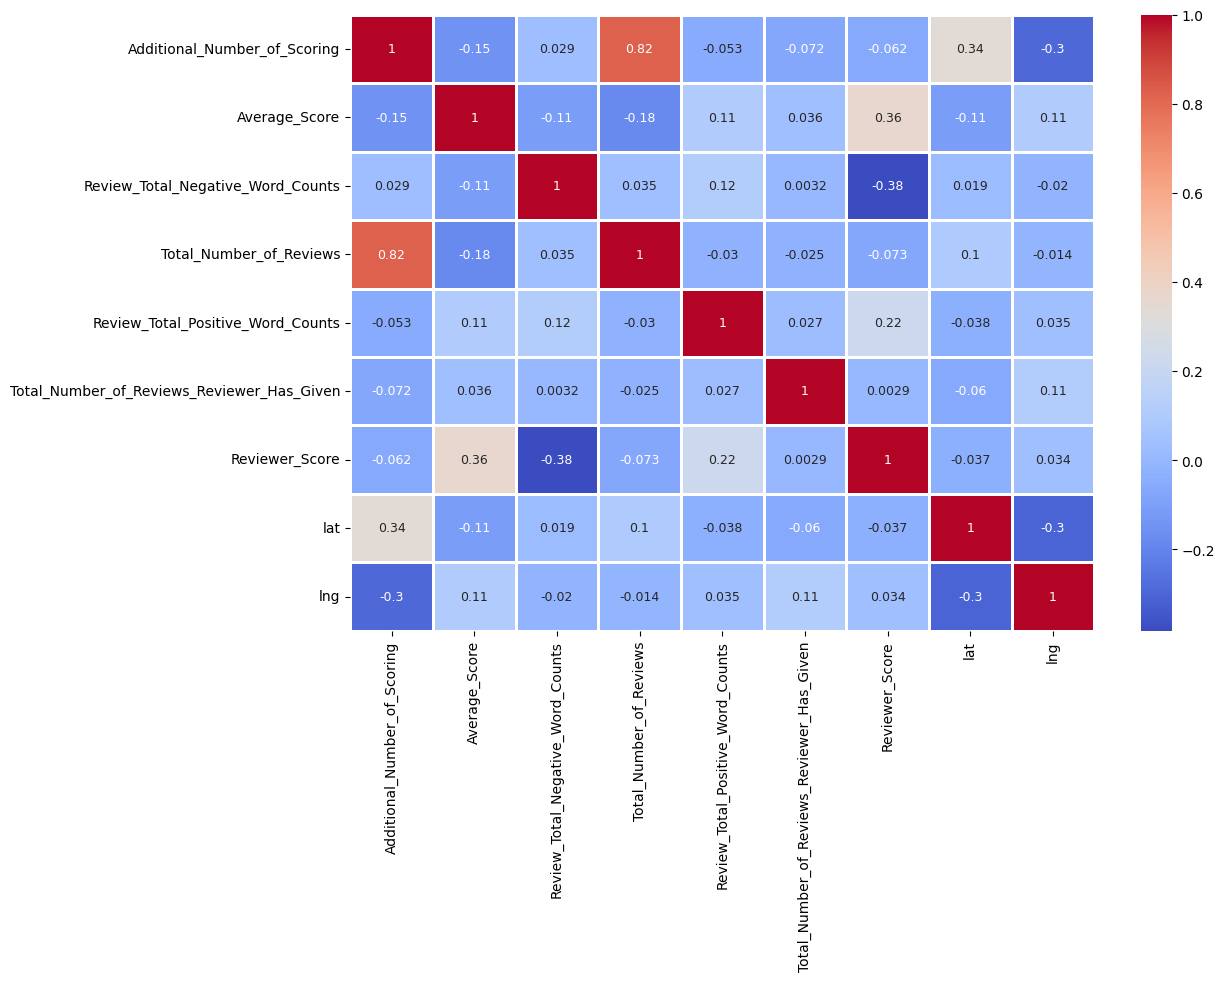

In [ ]:
# Features correlation map
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Additional_Number_of_Scoring,515738.0,498.081836,500.538467,1.000000,169.000000,341.000000,660.000000,2682.000000
Average_Score,515738.0,8.397487,0.548048,5.200000,8.100000,8.400000,8.800000,9.800000
Review_Total_Negative_Word_Counts,515738.0,18.539450,29.690831,0.000000,2.000000,9.000000,23.000000,408.000000
Total_Number_of_Reviews,515738.0,2743.743944,2317.464868,43.000000,1161.000000,2134.000000,3613.000000,16670.000000
Review_Total_Positive_Word_Counts,515738.0,17.776458,21.804185,0.000000,5.000000,11.000000,22.000000,395.000000
Total_Number_of_Reviews_Reviewer_Has_Given,515738.0,7.166001,11.040228,1.000000,1.000000,3.000000,8.000000,355.000000
Reviewer_Score,515738.0,8.395077,1.637856,2.500000,7.500000,8.800000,9.600000,10.000000
lat,512470.0,49.442439,3.466325,41.328376,48.214662,51.499981,51.516288,52.400181
lng,512470.0,2.823803,4.579425,-0.369758,-0.143372,0.010607,4.834443,16.429233


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Hotel_Address,515738,1493,163 Marsh Wall Docklands Tower Hamlets London ...,4789
Review_Date,515738,731,8/2/2017,2585
Hotel_Name,515738,1492,Britannia International Hotel Canary Wharf,4789
Reviewer_Nationality,515738,227,United Kingdom,245246
Negative_Review,515738,330011,No Negative,127890
Positive_Review,515738,412601,No Positive,35946
Tags,515738,55242,"[' Leisure trip ', ' Couple ', ' Double Room '...",5101
days_since_review,515738,731,1 days,2585


In [ ]:
df.Reviewer_Score.describe().T

count    515738.000000
mean          8.395077
std           1.637856
min           2.500000
25%           7.500000
50%           8.800000
75%           9.600000
max          10.000000
Name: Reviewer_Score, dtype: float64

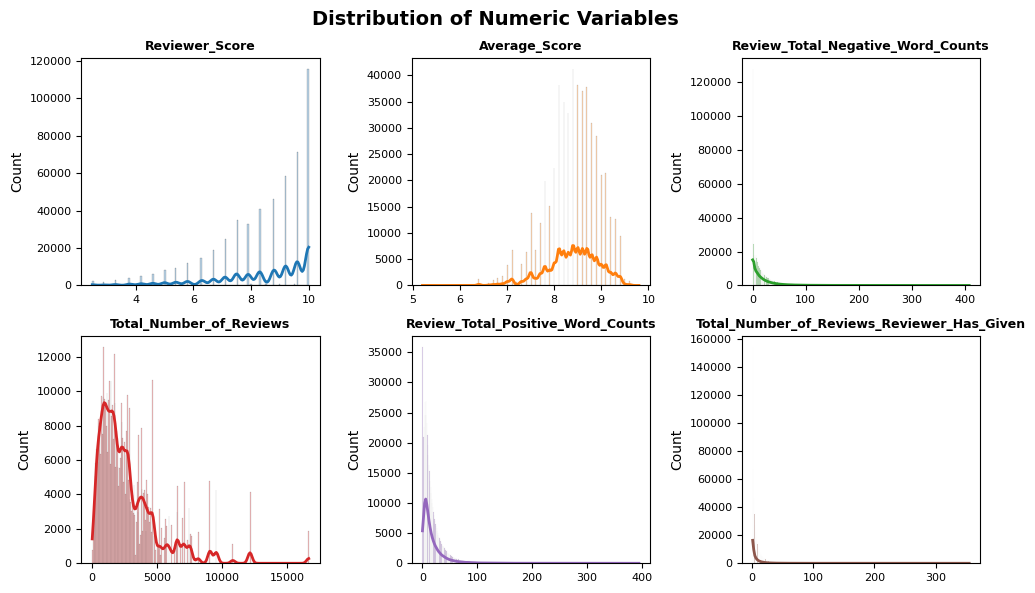

In [ ]:
# Overall distribution of all numerical features

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
axes = axes.flat
columnas = ['Reviewer_Score', 'Average_Score', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 
           'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given']

for i, colum in enumerate(columnas):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 9, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution of Numeric Variables', fontsize = 14, fontweight = "bold");

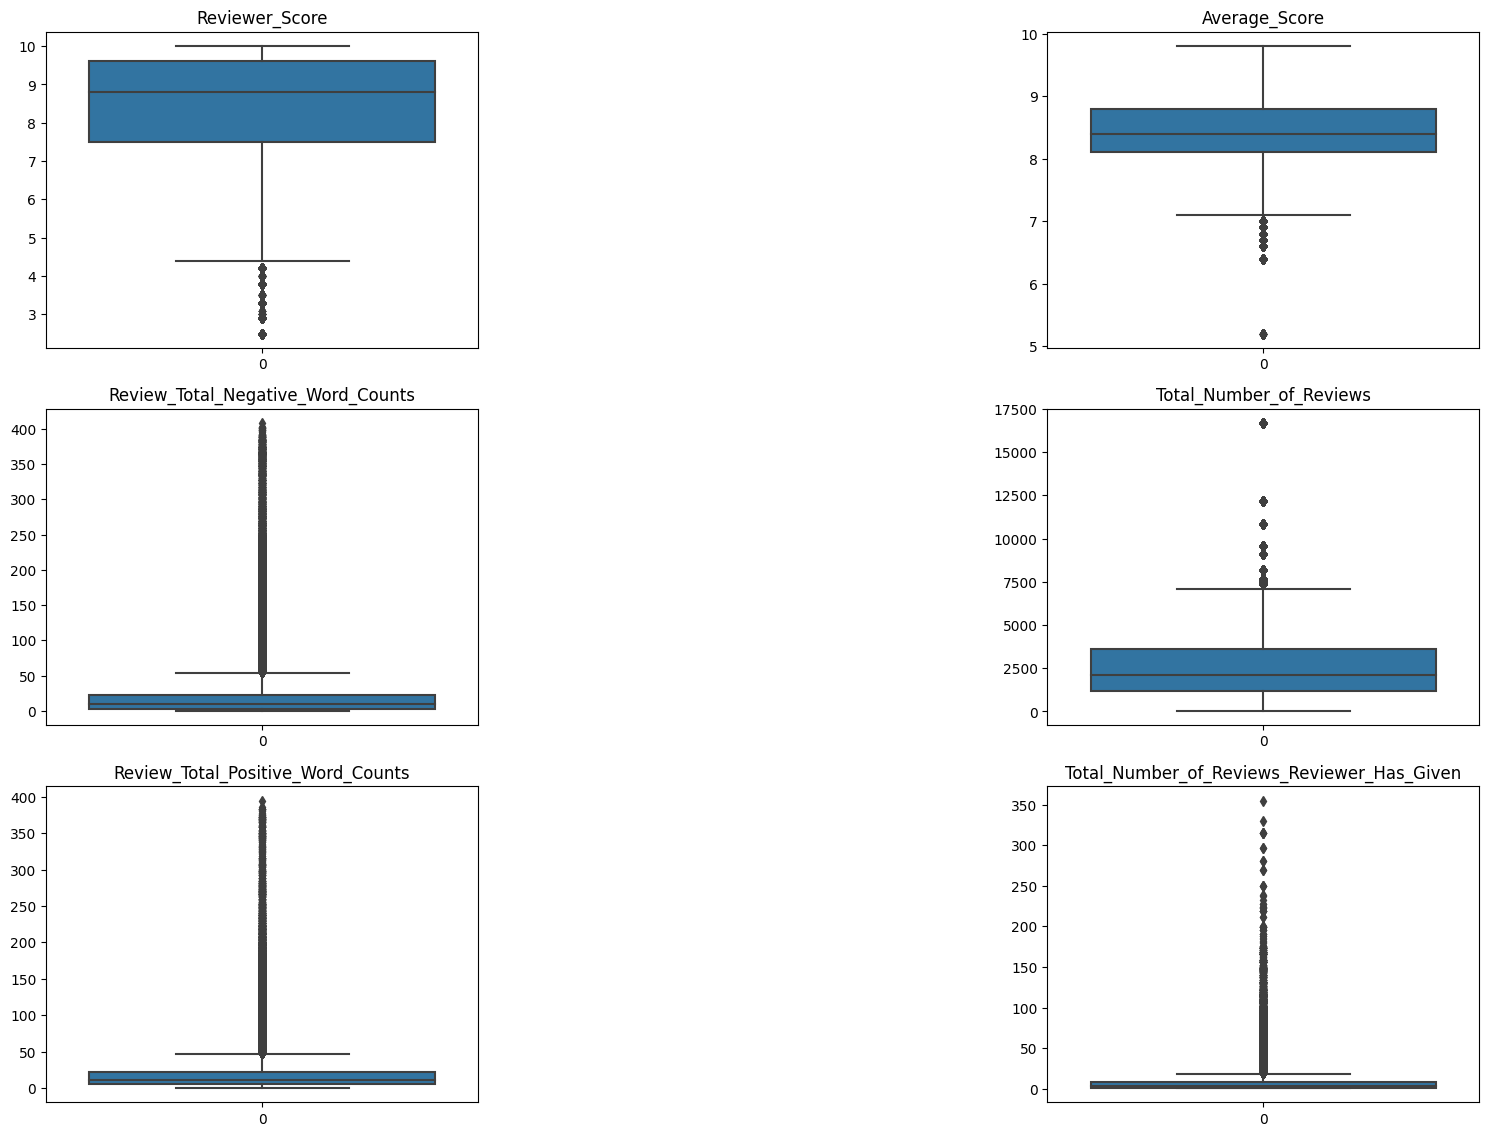

In [ ]:
# Outliers of the listed numerical features

columnas = ['Reviewer_Score', 'Average_Score', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 
           'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given']
n = 1
plt.figure(figsize=(20,15))

for column in columnas:
  plt.subplot(4,4,n)
  plt.title(column)
  n = n+2
  sns.boxplot(df[column])
  plt.tight_layout()


In [ ]:
print(f"Total Positive word count {df.Review_Total_Positive_Word_Counts.sum()}, Total negative word count {df.Review_Total_Negative_Word_Counts.sum()}")

Total Positive word count 9167995, Total negative word count 9561499


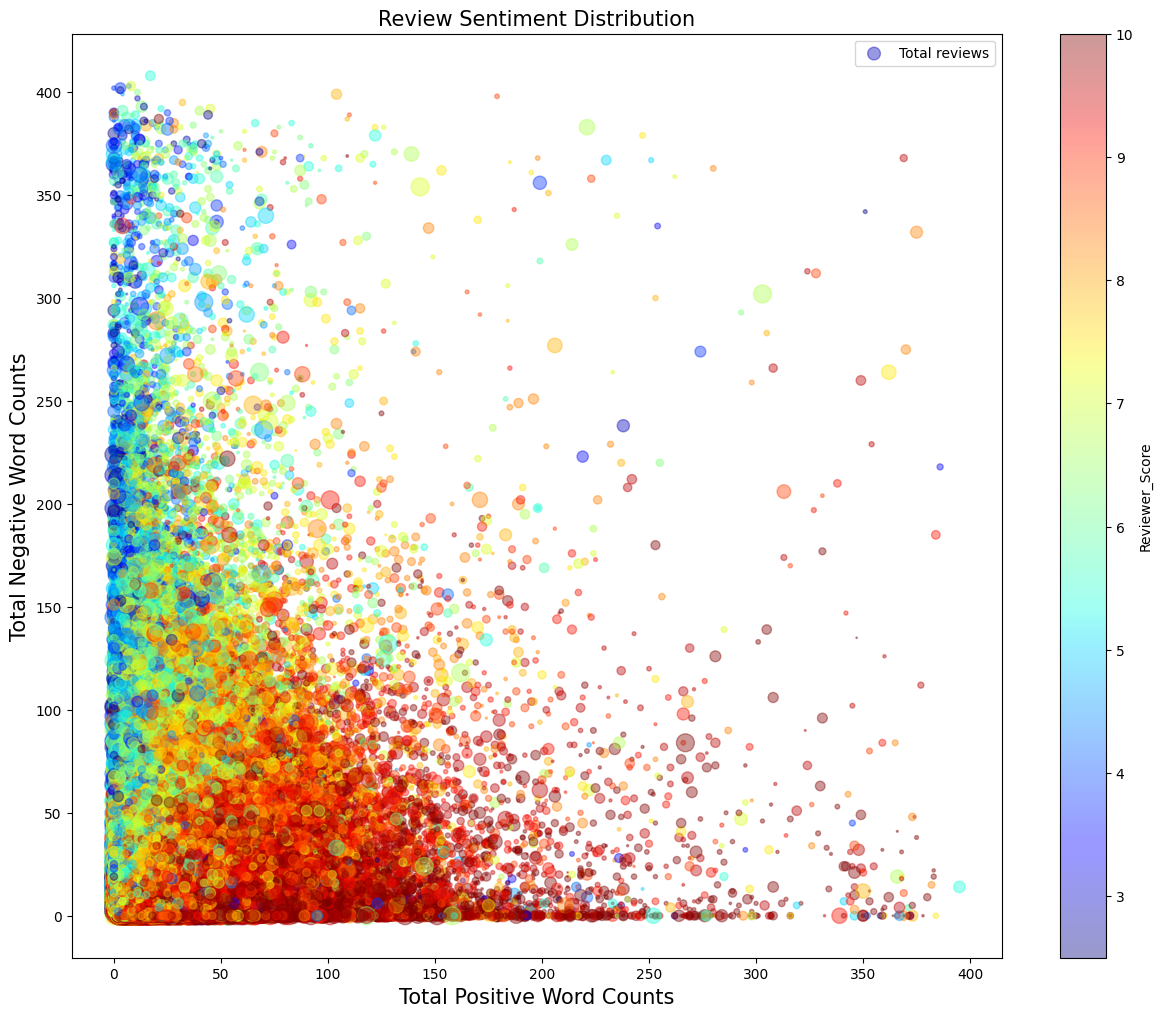

In [ ]:
df.plot(kind='scatter', 
                      x='Review_Total_Positive_Word_Counts', 
                      y='Review_Total_Negative_Word_Counts', 
                      label='Total reviews',
             s=df.Total_Number_of_Reviews/100,
             c='Reviewer_Score',
             cmap=plt.get_cmap('jet'), 
             colorbar=True, 
             alpha=0.4, figsize=(15,12),
             sharex=False, # label not showing up 
             )
font_size = 15
plt.title("Review Sentiment Distribution",  fontsize=font_size)
plt.xlabel("Total Positive Word Counts", fontsize=font_size)
plt.ylabel("Total Negative Word Counts",  fontsize=font_size)
plt.legend()
plt.show()

From the above graph, we can infer that - The value of Total positive word counts is lower than total negative word counts.

Although the distribution of Positive Review seems to dominate negative reviews, the distribution of Negative Review has higher negative word count in general

In [ ]:
# Top 20 Reviewer Nationality
reviews_count = df.Reviewer_Nationality.value_counts()[:20]
reviews_count

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
 Saudi Arabia                   8951
 Netherlands                    8772
 Switzerland                    8678
 Germany                        7941
 Canada                         7894
 France                         7296
 Israel                         6610
 Italy                          6114
 Belgium                        6031
 Turkey                         5444
 Kuwait                         4920
 Spain                          4737
 Romania                        4552
 Russia                         3900
 South Africa                   3821
Name: Reviewer_Nationality, dtype: int64

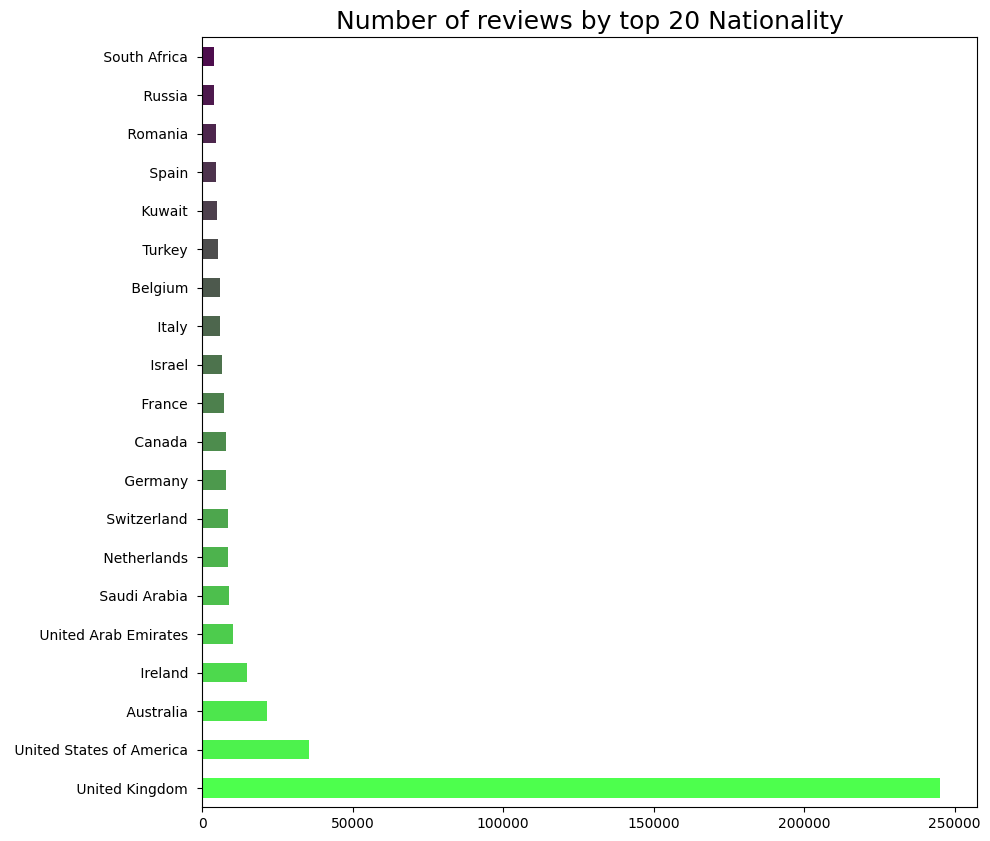

In [ ]:
# Colors
colors = []
dim = reviews_count.shape[0]
for i in range(dim):
    r = i * 1/dim
    colors.append((0.3,1-r,0.3))

reviews_count.plot.barh(figsize=(10,10), color = colors)
plt.title("Number of reviews by top 20 Nationality", fontsize = 18)
plt.ylabel("")

plt.show()

In [ ]:
# Best 10 hotels with highest average score
df[['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Average_Score',ascending = False)[:10]

,Hotel_Name,Average_Score,Total_Number_of_Reviews
54717,Ritz Paris,9.8,122
402244,H10 Casa Mimosa 4 Sup,9.6,454
185602,41,9.6,244
398945,Hotel The Serras,9.6,604
176997,H tel de La Tamise Esprit de France,9.6,166
316447,Hotel Casa Camper,9.6,732
14708,Haymarket Hotel,9.6,255
390999,Ham Yard Hotel,9.5,314
312809,Mercer Hotel Barcelona,9.5,362
81101,Le Narcisse Blanc Spa,9.5,222


In [ ]:
# Worst 10 hotels with highest average score
df[['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Average_Score',ascending = False).tail(10)

,Hotel_Name,Average_Score,Total_Number_of_Reviews
232697,Gainsborough Hotel,6.9,1884
130789,Bloomsbury Palace Hotel,6.8,2751
68936,Villa Eugenie,6.8,165
204614,Commodore Hotel,6.7,2400
485009,Ibis Styles Milano Palmanova,6.7,207
157843,Best Western Maitrise Hotel Edgware Road,6.6,461
129781,The Tophams Hotel,6.6,411
323302,Savoy Hotel Amsterdam,6.4,995
242324,Hotel Cavendish,6.4,2275
494791,Hotel Liberty,5.2,465


In [ ]:
# Worst 10 hotels with highest average score
worst_hotels = pd.DataFrame(df.groupby(['Hotel_Name', 'Total_Number_of_Reviews'])['Average_Score'].mean().sort_values(ascending=False).tail(10))
best_hotels = pd.DataFrame(df.groupby(['Hotel_Name', 'Total_Number_of_Reviews'])['Average_Score'].mean().sort_values(ascending=False).head(10))


In [ ]:
#Mining some important information from tags
df['Leisure'] = df['Tags'].map(lambda x: 1 if ' Leisure trip ' in x else 0)
df['Business'] = df['Tags'].map(lambda x: 2 if ' Business trip ' in x else 0)
df['Trip_type'] = df['Leisure'] + df['Business']
del df['Leisure'] , df['Business']

In [ ]:
# Replace values in the Trip Type column
df['Trip_type'] = df['Trip_type'].replace({1: 'Leisure', 2: 'Business', 0:'Others'})

In [ ]:
type_count = df['Trip_type'].value_counts()
type_count

Leisure     417778
Business     82939
Others       15021
Name: Trip_type, dtype: int64

Text(0.5, 1.0, 'Counts by Trip Type')

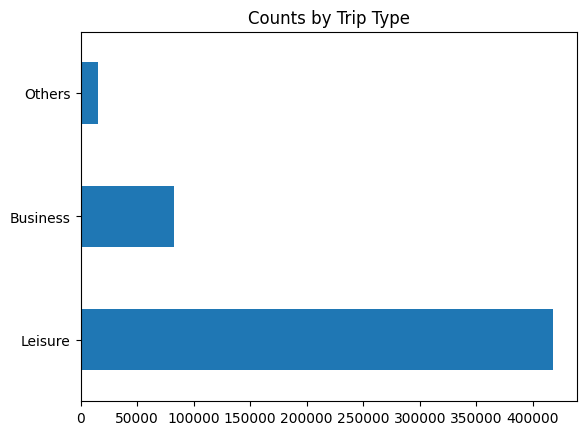

In [ ]:
# Create a bar chart of the counts
type_count.plot.barh(x=type_count)

# Add title and axis labels
plt.title("Counts by Trip Type")


In [ ]:
#Couple or Solo or Group or Family_with_older children or Family with younger Children
df['Solo'] = df['Tags'].map(lambda x: 1 if ' Solo traveler ' in x else 0)
df['Couple'] = df['Tags'].map(lambda x: 2 if ' Couple ' in x else 0)
df['Group'] = df['Tags'].map(lambda x: 3 if ' Group ' in x else 0)
df['Family_with_young_children'] = df['Tags'].map(lambda x: 4 if ' Family with young children ' in x else 0)
df['Family_with_older_children'] = df['Tags'].map(lambda x: 5 if ' Family with older children ' in x else 0)
                       
df['whom'] = df['Solo'] + df['Couple'] + df['Group'] + df['Family_with_young_children'] + df['Family_with_older_children']
del df['Solo'], df['Couple'],df['Group'], df['Family_with_young_children'],df['Family_with_older_children']

In [ ]:
# Replace values in the Trip Type column
df['whom'] = df['whom'].replace({1: 'Solo traveler', 2: 'Couple', 3:'Group', 4: 'Family with young children', 
                                 5:'Family with older children', 0:'Others'})

In [ ]:
whom_counts = df['whom'].value_counts()
whom_counts

Couple                        252294
Solo traveler                 108545
Group                          65392
Family with young children     61015
Family with older children     26349
Others                          2143
Name: whom, dtype: int64

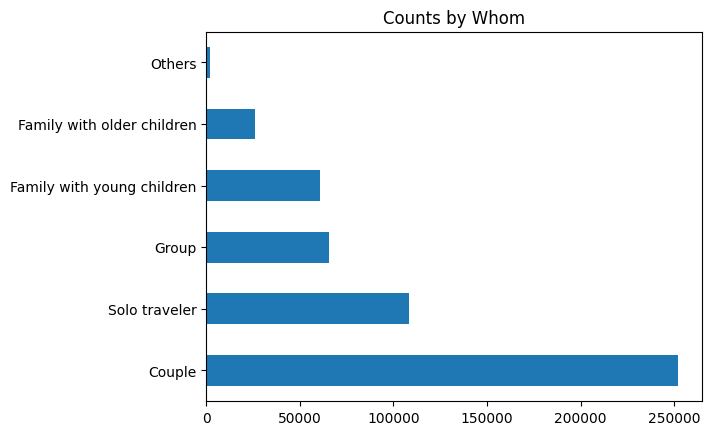

In [ ]:
# Create a bar chart of the counts
whom_counts.plot.barh(x=whom_counts)

# Add title and axis labels
plt.title("Counts by Whom")
plt.show()


# Visualization of the Text Data with Word Cloud

In [ ]:
def show_wordcloud_white(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

In [ ]:
def show_wordcloud_black(data, title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

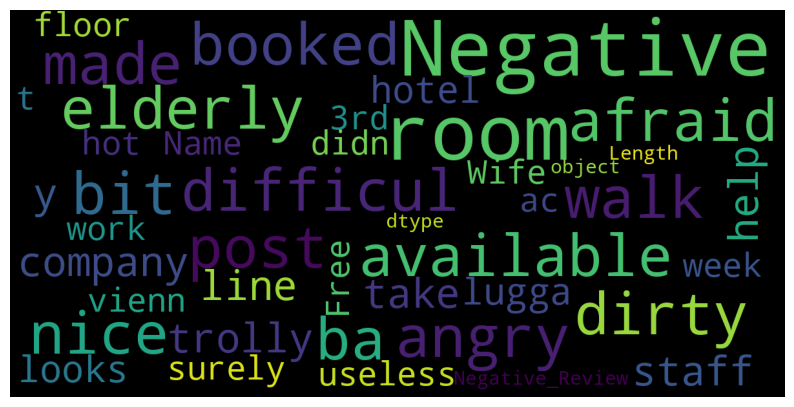

In [ ]:
# print Negative Review Worldcloud
show_wordcloud_black(df["Negative_Review"])

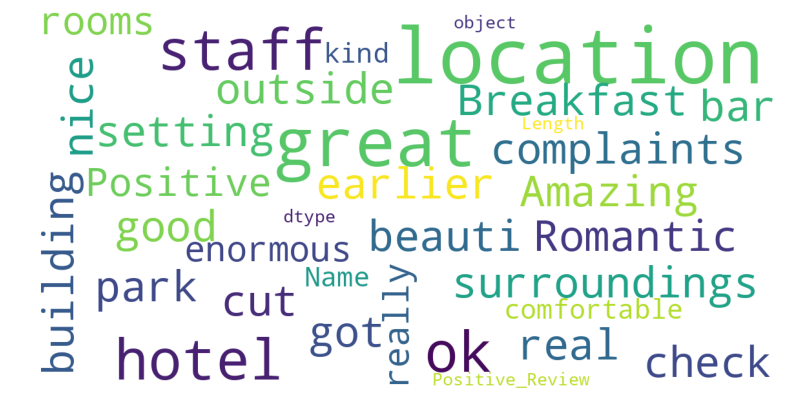

In [ ]:
# print Positive Review Worldcloud
show_wordcloud_white(df["Positive_Review"])

In [ ]:
# Get Positve and Negative Review for Best Rated hotel
best_hotel_positive = df['Positive_Review'][df['Hotel_Name'] == 'Ritz Paris']
best_hotel_negative = df["Negative_Review"][df['Hotel_Name'] == 'Ritz Paris']

In [ ]:
# Get Positve and Negative Review for Worst Rated hotel
worst_hotel_positive = df['Positive_Review'][df['Hotel_Name'] == 'Hotel Liberty']
worst_hotel_negative = df["Negative_Review"][df['Hotel_Name'] == 'Hotel Liberty']

In [ ]:
len(worst_hotel_negative)

65

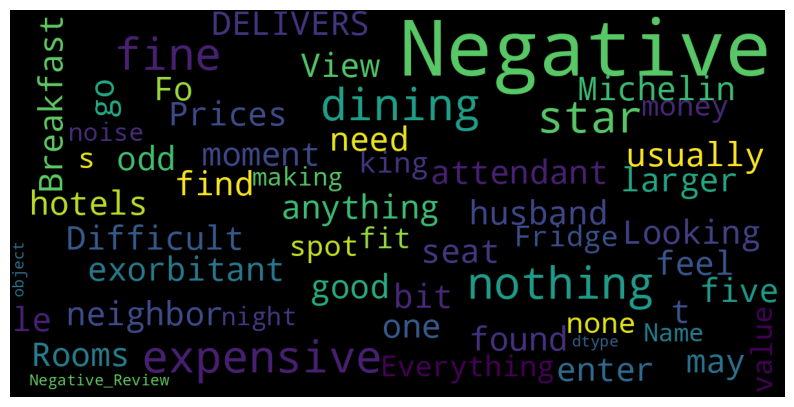

In [ ]:
# print Negative Review Worldcloud - Ritz Paris
show_wordcloud_black(best_hotel_negative)

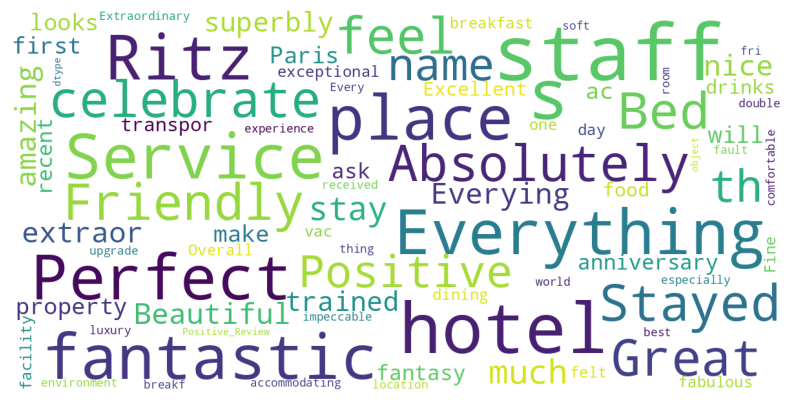

In [ ]:
# print Positive Review Worldcloud - Riz Paris
show_wordcloud_white(best_hotel_positive)

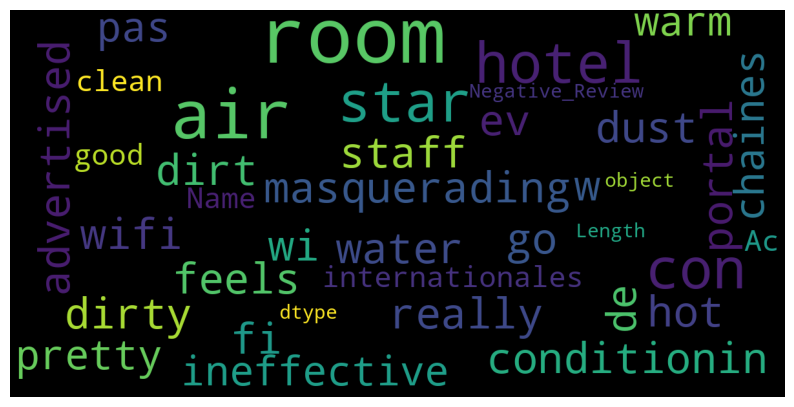

In [ ]:
# print Negative Review Worldcloud - Hotel Liberty
show_wordcloud_black(worst_hotel_negative)

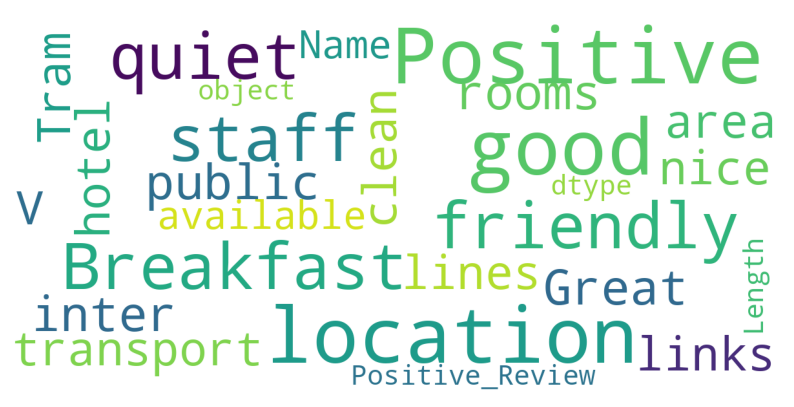

In [ ]:
# print Positive Review Worldcloud - Hotel Liberty
show_wordcloud_white(worst_hotel_positive)

# Data preprocessing (Cleaning)

In [ ]:
import nltk # Natural language processing toolkit
from nltk import FreqDist # Frequency distribution


In [ ]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

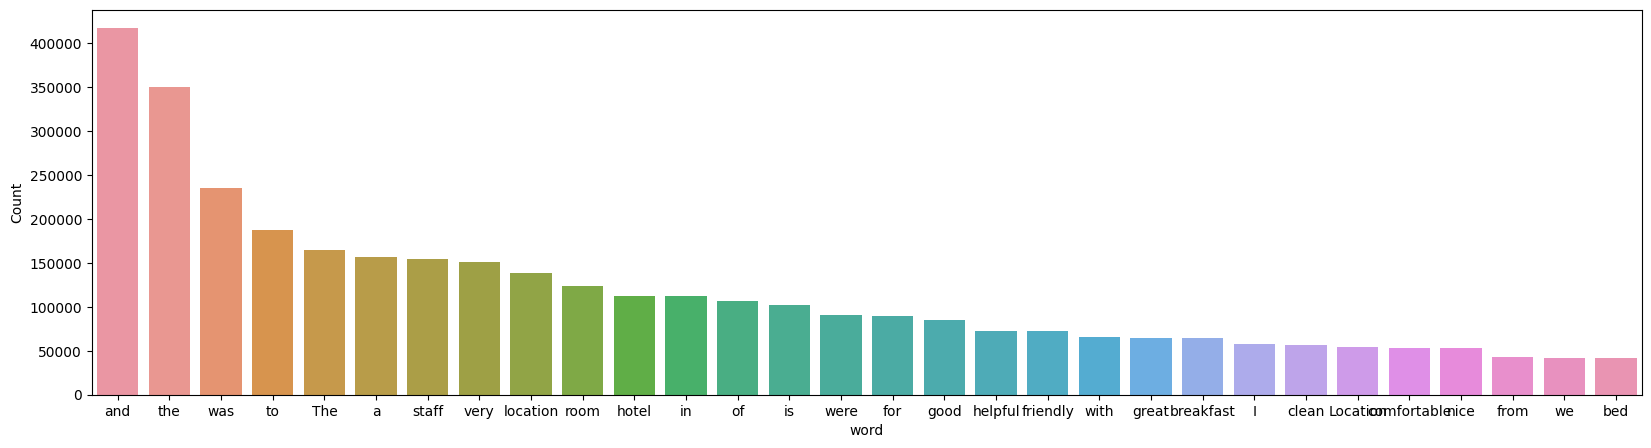

In [ ]:
freq_words(df['Positive_Review']) # Frequency distribution of common words in positive reviews

In [ ]:
df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Trip_type,whom
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Leisure,Couple
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Leisure,Couple
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Leisure,Family with young children
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,Leisure,Solo traveler
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,Leisure,Couple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677,Leisure,Family with older children
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677,Leisure,Family with young children
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677,Leisure,Family with older children
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677,Leisure,Group


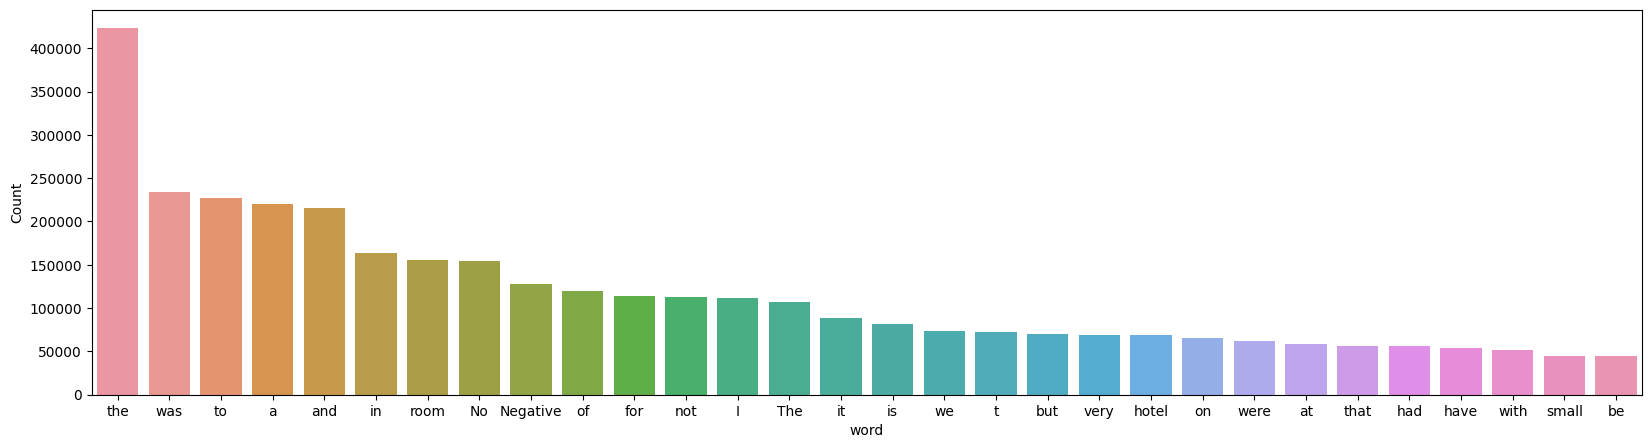

In [ ]:
freq_words(df['Negative_Review'])  

In [ ]:
df['Positive_Review'] = df['Positive_Review'].str.replace("[^a-zA-Z#]", " ")
df['Negative_Review'] = df['Negative_Review'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words=nltk.corpus.stopwords.words('english')
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new
# I would apply everyting below to both positive and negative reviews
# remove short words (length < 3)
df['Positive_Review'] = df['Positive_Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
df['Negative_Review'] = df['Negative_Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))


# remove stopwords from the text
reviews_1 = [remove_stopwords(r.split()) for r in df['Positive_Review']]
reviews_2 = [remove_stopwords(r.split()) for r in df['Negative_Review']]

In [ ]:
# Other text to remove
# Negative needs to be removed from negative_reviews as there are many comments says "No Negative"
other_texts = ['Negative','negative']

In [ ]:
def remove_otherwords(rev):
    rev_new = " ".join([i for i in rev if i not in other_texts])
    return rev_new

In [ ]:
# remove Other Unwanted Words from the text
reviews_3 = [remove_otherwords(r.split()) for r in reviews_1]
reviews_4 = [remove_otherwords(r.split()) for r in reviews_2]

In [ ]:
# Convert review_1 and review_2 to lower case
reviews_1_lower = [x.lower() for x in reviews_1]
reviews_2_lower = [x.lower() for x in reviews_2]

In [ ]:
# Convert review_1 and review_2 to lower case
reviews_3_lower = [x.lower() for x in reviews_3]
reviews_4_lower = [x.lower() for x in reviews_4]

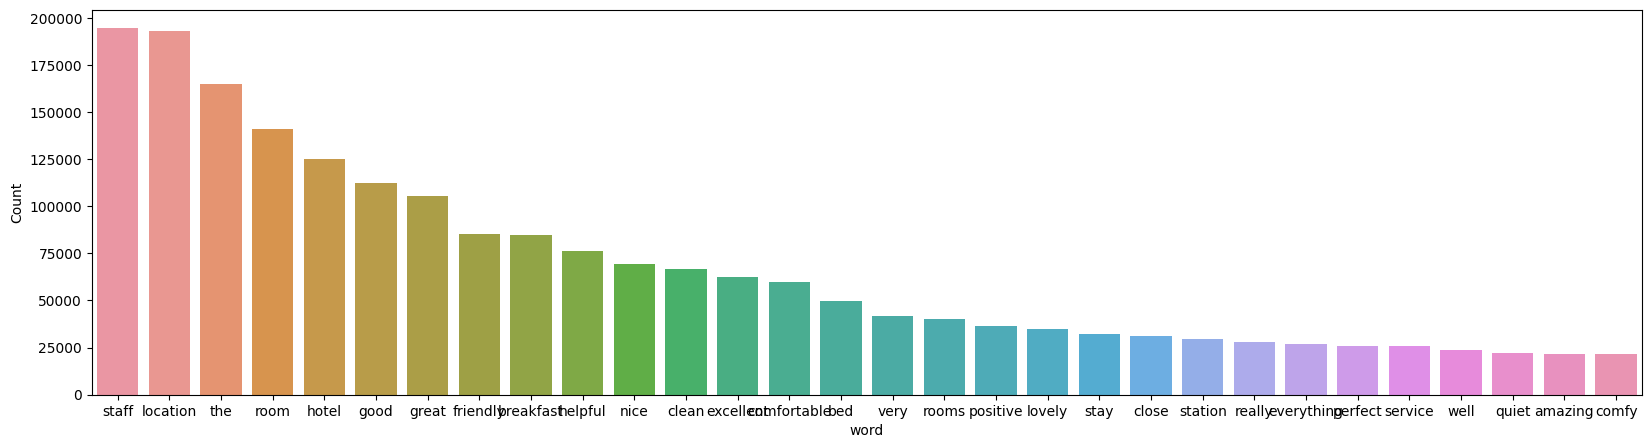

In [ ]:
freq_words(reviews_3_lower, 30) # Checking frequency of most used words in positive reviews

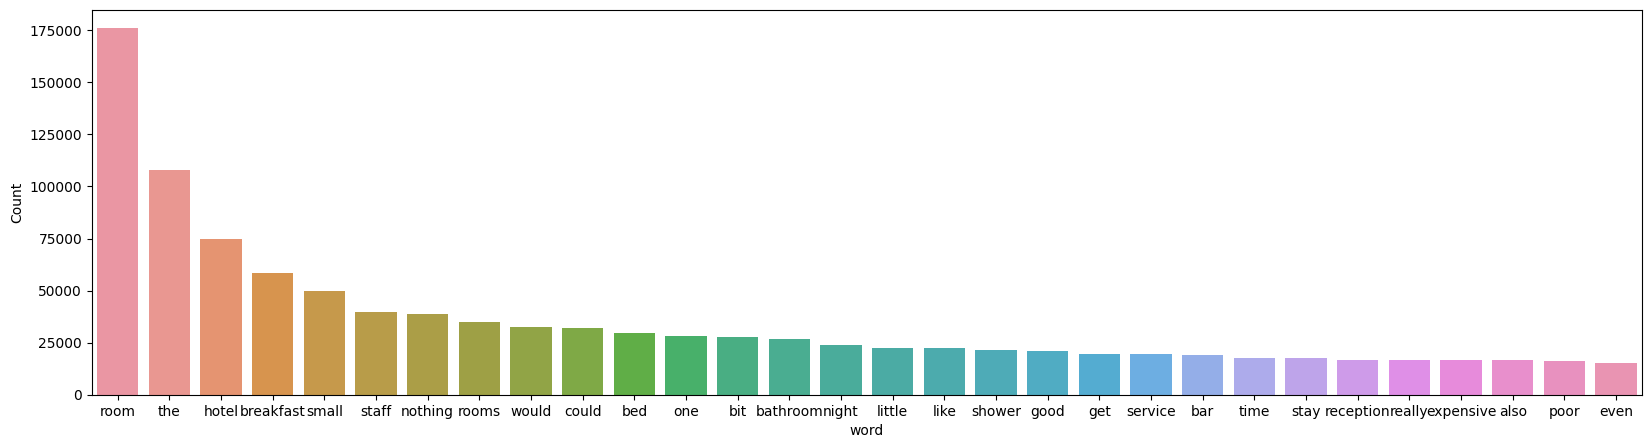

In [ ]:
freq_words(reviews_4_lower, 30) # Checking frequency of most used words in negative reviews

**Word Frequency by Trip Type**

Business

In [ ]:
# remove short words (length < 3)
df['Positive_Review'] = df['Positive_Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
df['Negative_Review'] = df['Negative_Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [ ]:
# Get Positve and Negative Review for Leisure Travellers
leisure_positive = df['Positive_Review'][df['Trip_type'] == 'Leisure']
leisure_negative = df["Negative_Review"][df['Trip_type'] == 'Leisure']

In [ ]:
# Get Positve and Negative Review for Business Travellers
business_positive = df["Positive_Review"][df['Trip_type'] == 'Business']
business_negative = df["Negative_Review"][df['Trip_type'] == 'Business']

In [ ]:
# remove stopwords from the text
business_positive = [remove_stopwords(r.split()) for r in business_positive]
business_negative = [remove_stopwords(r.split()) for r in business_negative]

In [ ]:
# Convert to lower case
business_positive = [x.lower() for x in business_positive]
business_negative = [x.lower() for x in business_negative]

In [ ]:
# Remove other words
other_texts_business = ['good','great','very','nice','room','hotel','like','also','really','well','would','lovely','the','negative','positive','could','rooms','perfect','one','bit']

def remove_otherwords(rev):
    rev_new = " ".join([i for i in rev if i not in other_texts_business])
    return rev_new

# remove Other Unwanted Words from the text
business_positive = [remove_otherwords(r.split()) for r in business_positive]
business_negative = [remove_otherwords(r.split()) for r in business_negative]

In [ ]:
# Count of review provided by Business Travellers
len(business_negative)

82939

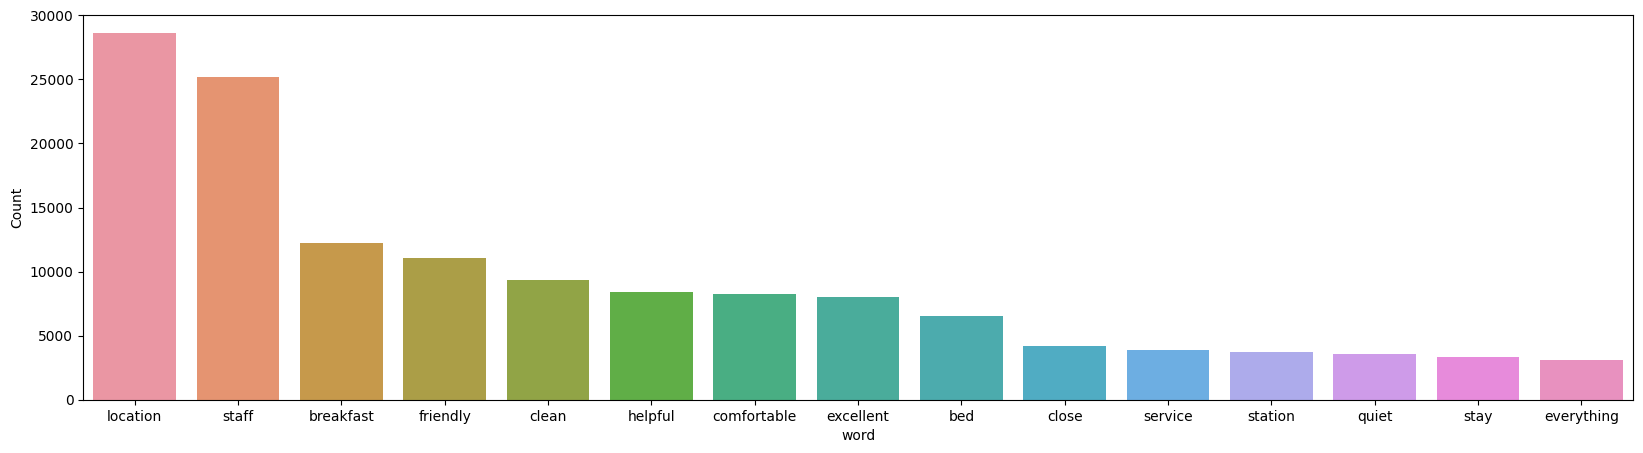

In [ ]:
freq_words(business_positive, 15) # Checking frequency of most used words in negative reviews for Business Travellers

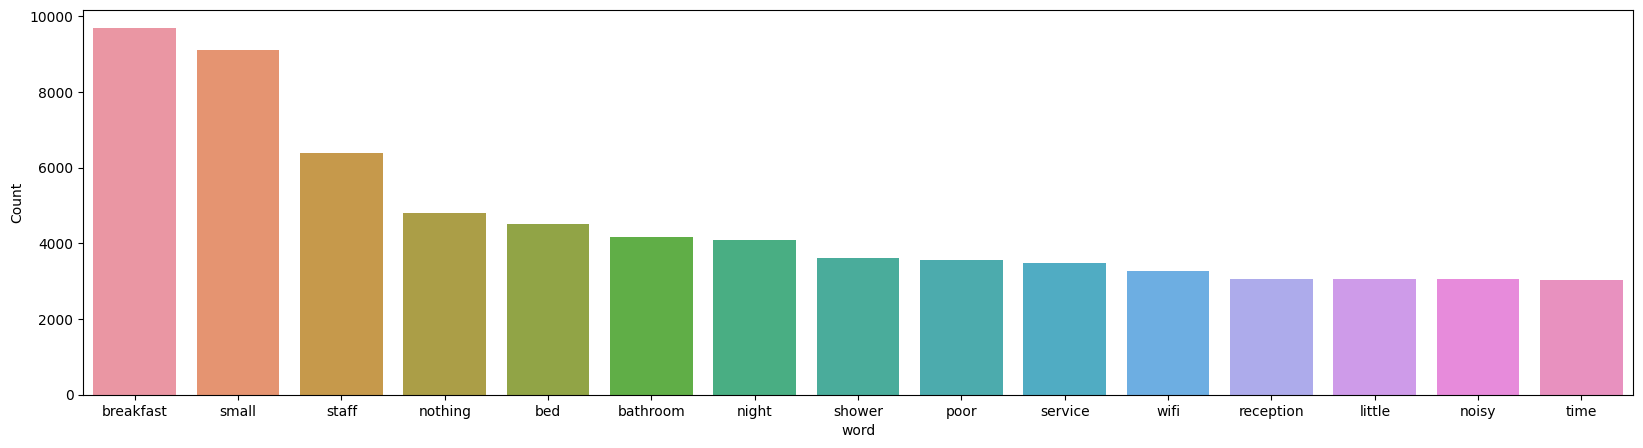

In [ ]:
freq_words(business_negative, 15) # Checking frequency of most used words in negative reviews for Business Travellers

Leisure

In [ ]:
# Get Positve and Negative Review for Leisure Travellers
leisure_positive = df['Positive_Review'][df['Trip_type'] == 'Leisure']
leisure_negative = df["Negative_Review"][df['Trip_type'] == 'Leisure']

In [ ]:
# Convert to lower case
leisure_positive = [x.lower() for x in leisure_positive]
leisure_negative = [x.lower() for x in leisure_negative]

In [ ]:
# remove stopwords from the text
leisure_positive = [remove_stopwords(r.split()) for r in leisure_positive]
leisure_negative = [remove_stopwords(r.split()) for r in leisure_negative]

In [ ]:
# Remove other words
other_texts_leisure = ['good','great','very','nice','room','hotel','like','also','really','well','would','lovely','excellent','negative','positive','could','perfect','rooms','get','amazing','one','bit']

def remove_otherwords(rev):
    rev_new = " ".join([i for i in rev if i not in other_texts_leisure])
    return rev_new

# remove Other Unwanted Words from the text
leisure_positive = [remove_otherwords(r.split()) for r in leisure_positive]
leisure_negative = [remove_otherwords(r.split()) for r in leisure_negative]

In [ ]:
# Count of review provided by Business Travellers
len(leisure_negative)

417778

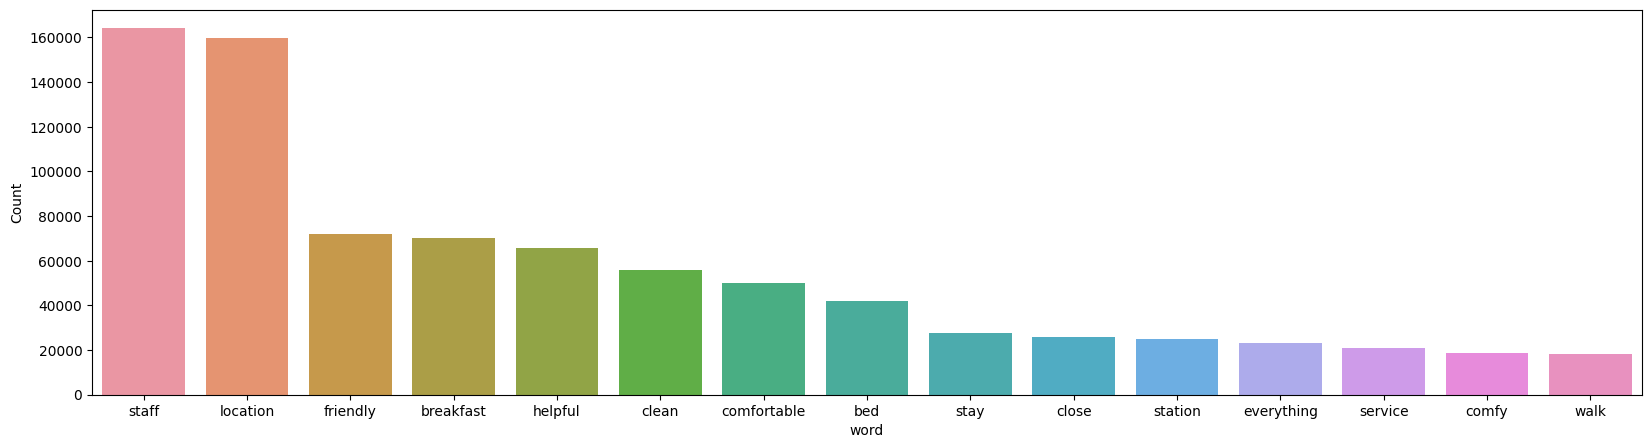

In [ ]:
freq_words(leisure_positive, 15) # Checking frequency of most used words in positive reviews for Leisure Travellers

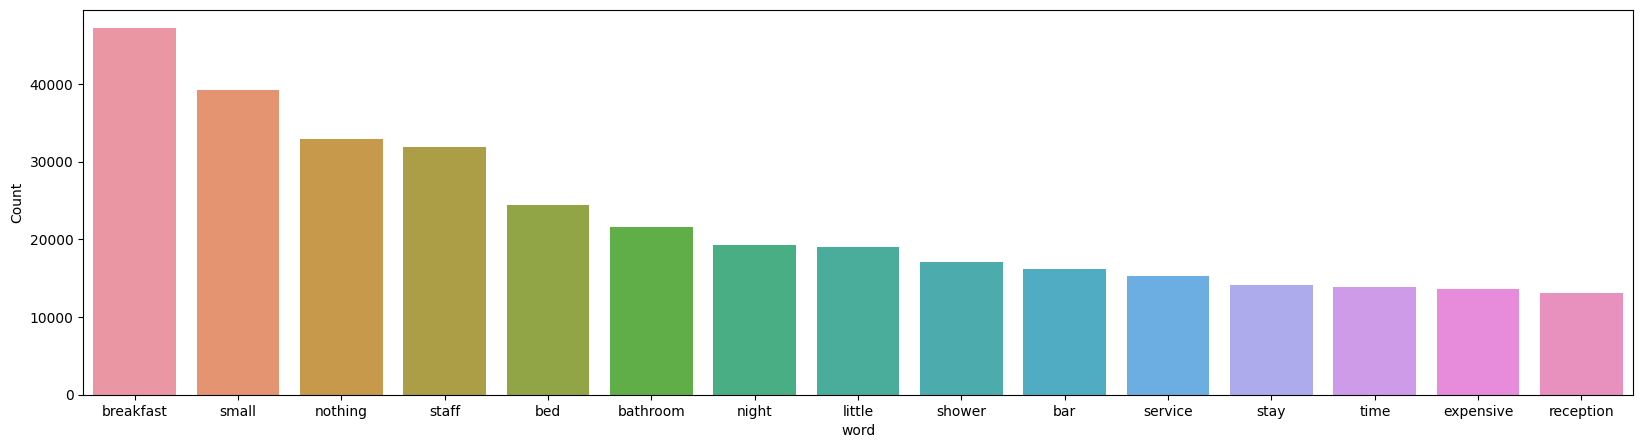

In [ ]:
freq_words(leisure_negative, 15) # Checking frequency of most used words in negative reviews for Leisure Travellers

**Word Frequency by Whom**

Couple

In [ ]:
# Get Positve and Negative Review for Whom
couple_positive = df['Positive_Review'][df['whom'] == 'Couple']
couple_negative = df["Negative_Review"][df['whom'] == 'Couple']

In [ ]:
# remove stopwords from the text
couple_positive = [remove_stopwords(r.split()) for r in couple_positive]
couple_negative = [remove_stopwords(r.split()) for r in couple_negative]

In [ ]:
# Convert to lower case
couple_positive = [x.lower() for x in couple_positive]
couple_negative = [x.lower() for x in couple_negative]

In [ ]:
# Remove other words
other_texts_couple = ['good','great','very','nice','room','hotel','like','also','really','well','would','lovely','excellent','negative','positive','could','perfect','rooms','get','amazing','the']

def remove_otherwords(rev):
    rev_new = " ".join([i for i in rev if i not in other_texts_couple])
    return rev_new

# remove Other Unwanted Words from the text
couple_positive = [remove_otherwords(r.split()) for r in couple_positive]
couple_negative = [remove_otherwords(r.split()) for r in couple_negative]

In [ ]:
# Count of review provided by Couple
len(couple_negative)

252294

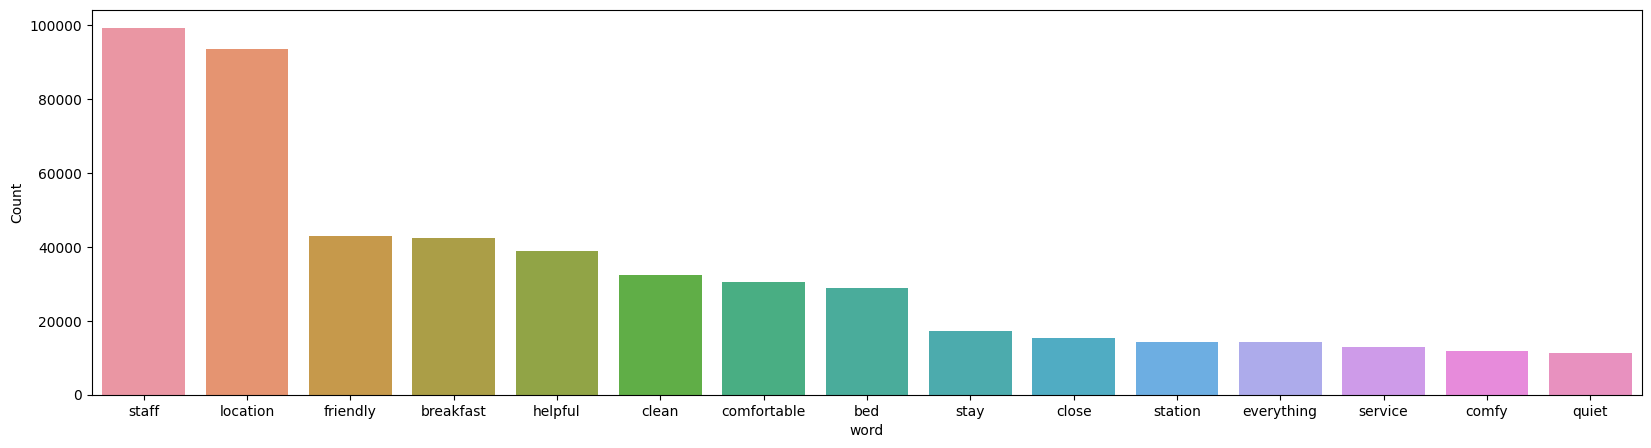

In [ ]:
freq_words(couple_positive, 15) # Checking frequency of most used words in positive reviews for couple Travellers

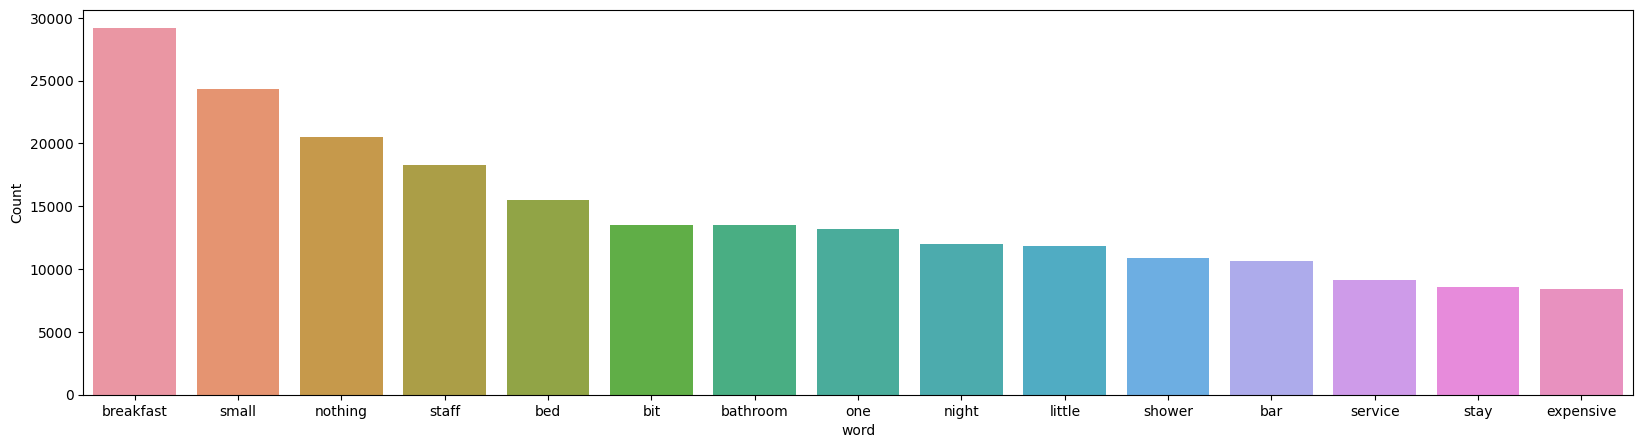

In [ ]:
freq_words(couple_negative, 15) # Checking frequency of most used words in negative reviews for couple Travellers

Solo Traveller

In [ ]:
# Get Positve and Negative Review for Leisure Travellers
solo_positive = df['Positive_Review'][df['whom'] == 'Solo traveler']
solo_negative = df["Negative_Review"][df['whom'] == 'Solo traveler']

In [ ]:
# remove stopwords from the text
solo_positive = [remove_stopwords(r.split()) for r in solo_positive]
solo_negative = [remove_stopwords(r.split()) for r in solo_negative]

In [ ]:
# Convert to lower case
solo_positive = [x.lower() for x in solo_positive]
solo_negative = [x.lower() for x in solo_negative]

In [ ]:
# Remove other words
other_texts_solo = ['good','great','very','nice','room','hotel','like','also','really','well','would','lovely','excellent','rooms','perfect','the','negative','positive']

def remove_otherwords(rev):
    rev_new = " ".join([i for i in rev if i not in other_texts_solo])
    return rev_new

# remove Other Unwanted Words from the text
solo_positive = [remove_otherwords(r.split()) for r in solo_positive]
solo_negative = [remove_otherwords(r.split()) for r in solo_negative]

In [ ]:
# Count of review provided by Business Travellers
len(solo_negative)

108545

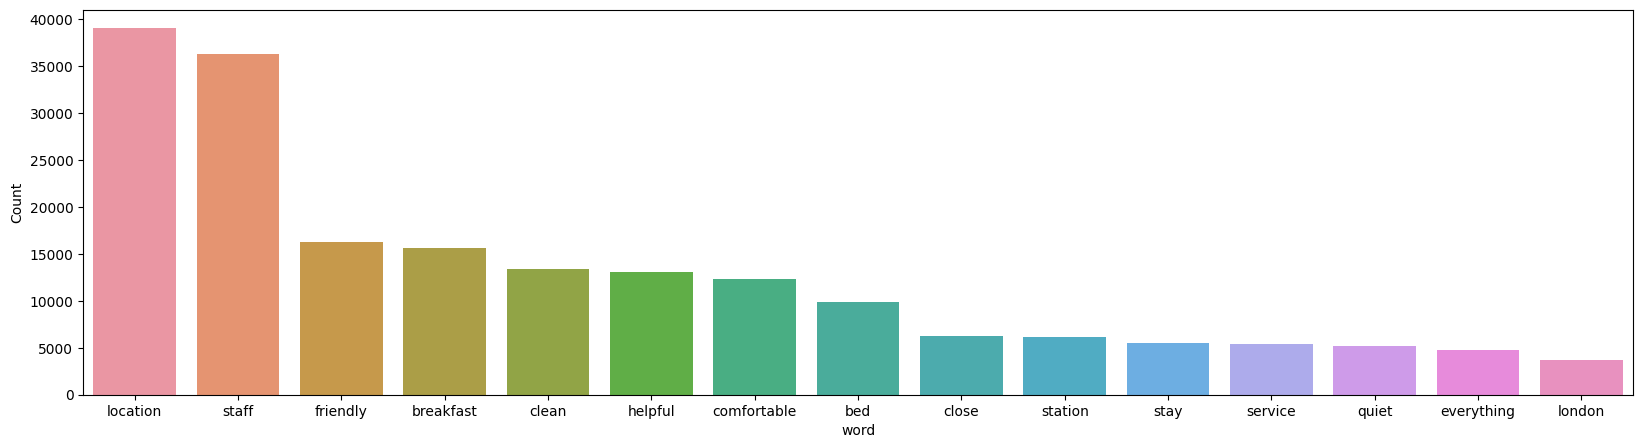

In [ ]:
freq_words(solo_positive, 15) # Checking frequency of most used words in positive reviews for solo Travellers

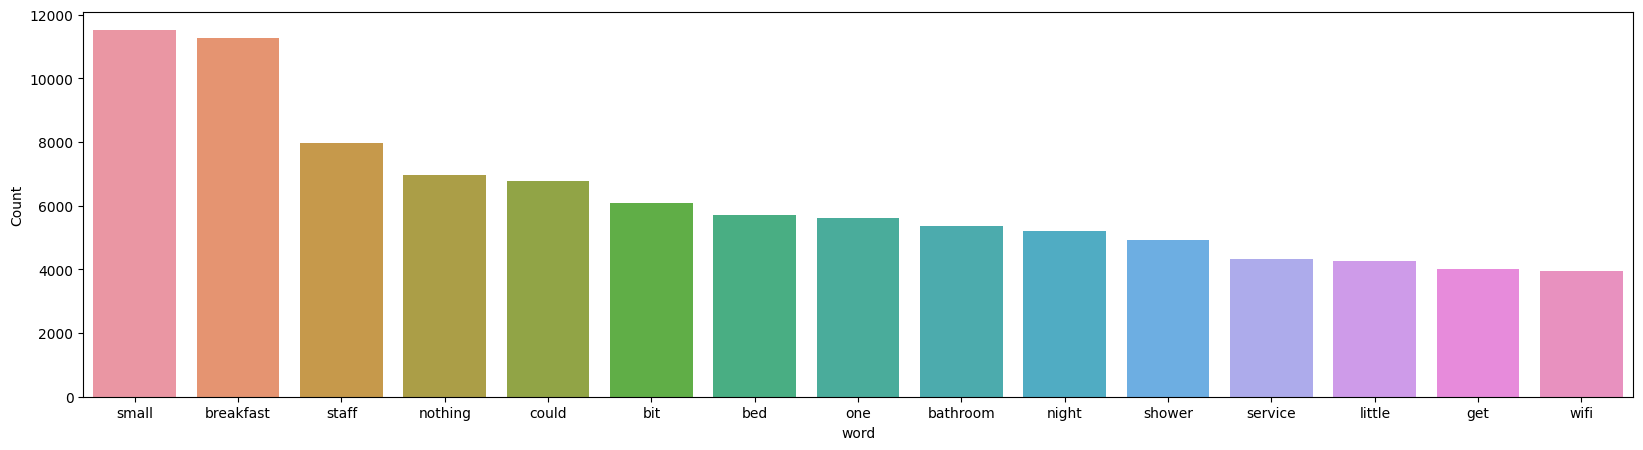

In [ ]:
freq_words(solo_negative, 15) # Checking frequency of most used words in negative reviews for solo Travellers

Family with young kids

In [ ]:
# Get Positve and Negative Review for Family with young children
ykids_positive = df['Positive_Review'][df['whom'] == 'Family with young children']
ykids_negative = df["Negative_Review"][df['whom'] == 'Family with young children']

In [ ]:
# remove stopwords from the text
ykids_positive = [remove_stopwords(r.split()) for r in ykids_positive]
ykids_negative = [remove_stopwords(r.split()) for r in ykids_negative]

In [ ]:
# Convert to lower case
ykids_positive = [x.lower() for x in ykids_positive]
ykids_negative = [x.lower() for x in ykids_negative]

In [ ]:
# Remove other words
other_texts_ykids = ['good','great','very','nice','room','hotel','like','also','really','well','would','lovely','there','could','excellent','perfect','the','negative','positive','get','bit','one']

def remove_otherwords(rev):
    rev_new = " ".join([i for i in rev if i not in other_texts_ykids])
    return rev_new

# remove Other Unwanted Words from the text
ykids_positive = [remove_otherwords(r.split()) for r in ykids_positive]
ykids_negative = [remove_otherwords(r.split()) for r in ykids_negative]

In [ ]:
# Count of review provided by Business Travellers
len(ykids_negative)

61015

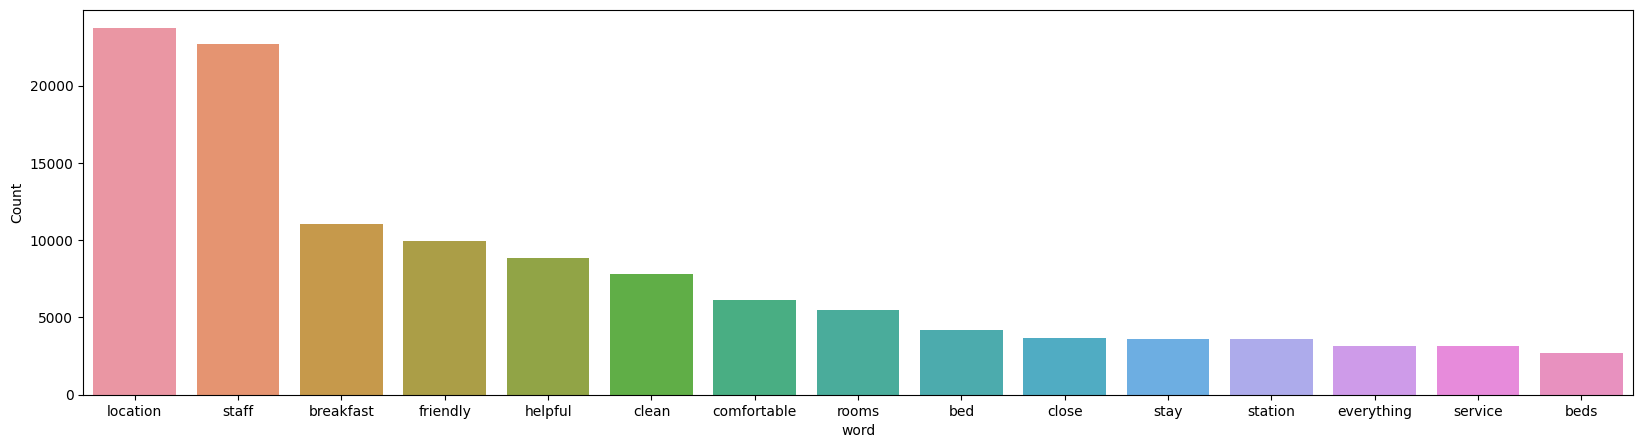

In [ ]:
freq_words(ykids_positive, 15) # Checking frequency of most used words in positive reviews for Family with Young Kids

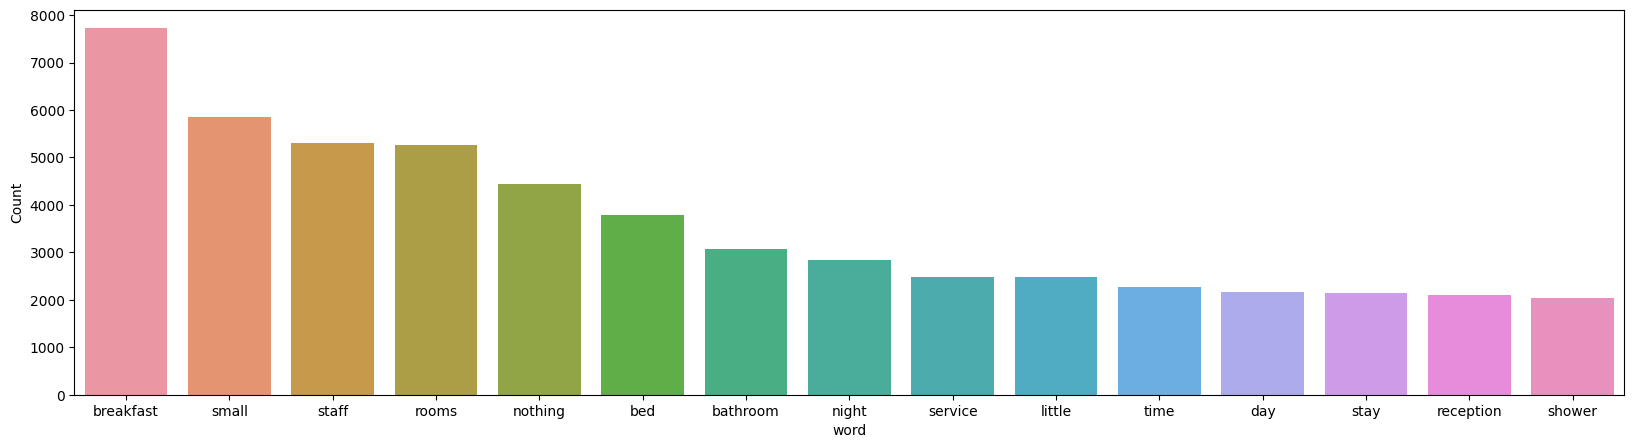

In [ ]:
freq_words(ykids_negative, 15) # Checking frequency of most used words in negative reviews for Family with Young Kids

Family with older children

In [ ]:
# Get Positve and Negative Review for Family with older children
okids_positive = df['Positive_Review'][df['whom'] == 'Family with older children']
okids_negative = df["Negative_Review"][df['whom'] == 'Family with older children']

In [ ]:
# remove stopwords from the text
okids_positive = [remove_stopwords(r.split()) for r in okids_positive]
okids_negative = [remove_stopwords(r.split()) for r in okids_negative]

In [ ]:
# Convert to lower case
okids_positive = [x.lower() for x in okids_positive]
okids_negative = [x.lower() for x in okids_negative]

In [ ]:
# Count of review provided by Business Travellers
len(okids_negative)

26349

In [ ]:
# Remove other words
other_texts_okids = ['good','great','very','nice','room','hotel','like','also','really','well','would','lovely','there','could','excellent','perfect','the','positive','negative','one','bit','get']

def remove_otherwords(rev):
    rev_new = " ".join([i for i in rev if i not in other_texts_okids])
    return rev_new

# remove Other Unwanted Words from the text
okids_positive = [remove_otherwords(r.split()) for r in okids_positive]
okids_negative = [remove_otherwords(r.split()) for r in okids_negative]

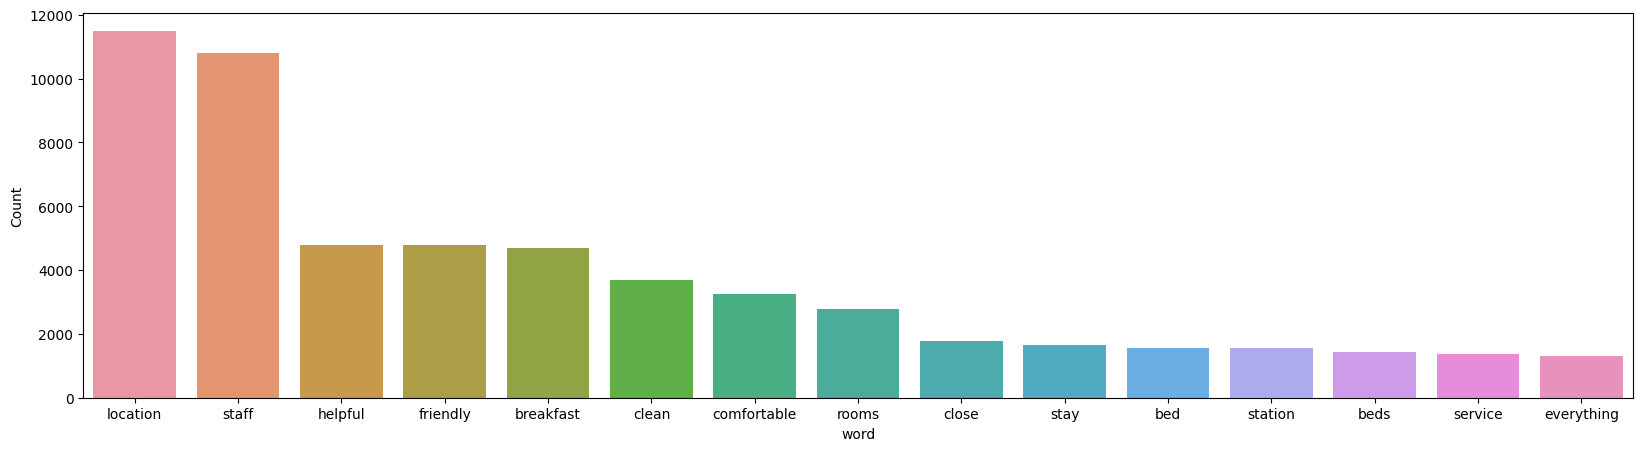

In [ ]:
freq_words(okids_positive, 15) # Checking frequency of most used words in positive reviews for Family with older Kids

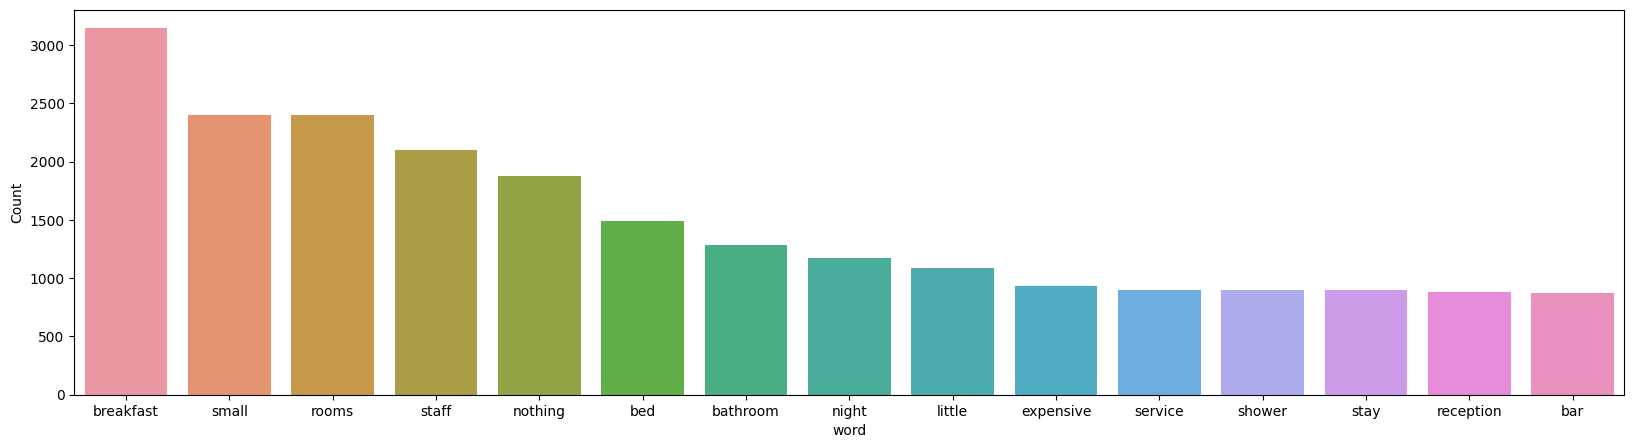

In [ ]:
freq_words(okids_negative, 15) # Checking frequency of most used words in negative reviews for Family with older Kids